In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [345]:
import seaborn as sns

In [346]:
diabetes = pd.read_csv('data/diabetes.csv')

In [347]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Столбцы:
"Glucose" - уровень глюкозы в крови;
"inslin" -  уровень инсулина в крови;
"DiabetesPedigreeFunction" - Предрасположенность к диабету;
"Outcome" - наличие диабета
"Pregnancies" - число беременностей;
"BloodPressure" - кровяное давление;
"SkinThickness" - Толщина кожи;
"BMI" - индекс массы тела;
"Age" - возраст

In [348]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Число наблюдений - 768, количество столбцов - 9

In [349]:
#Находим количестов нулевых значений в столбцах
colls_null_proc = diabetes.isnull().mean() * 100
print(colls_null_proc)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [350]:
# По таблице видно, что в столбцах "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" есть пропуски в виде 0
#Т.к. это количественные признаки, они не могут равняться 0
#Заменим 0 на класс NaN, чтобы было удобнее работать с пропусками
diabetes["Glucose"] = diabetes["Glucose"].apply(lambda x: np.nan if x == 0 else x)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
diabetes["Insulin"] = diabetes["Insulin"].apply(lambda x: np.nan if x == 0 else x)
diabetes["BMI"] = diabetes["BMI"].apply(lambda x: np.nan if x == 0 else x)

In [351]:
#Задаём tresh для отсеивания признаков в которых больще 30% значений - пропуски
tresh = diabetes.shape[0] * 0.7
diabetes = diabetes.dropna(axis=1, thresh=tresh)


In [352]:
#Создаём словарь для заполнения пропусов в вышеперечисленных количественных признаках
#Количественные признаки заполняем средним значением по столбцу
fillna_dict = {'Glucose': diabetes['Glucose'].median(),
               'BloodPressure': diabetes['BloodPressure'].median(),
               'SkinThickness': diabetes['SkinThickness'].median(),
               'BMI': diabetes['BMI'].median()}
#Заполняем пропуски
diabetes = diabetes.fillna(fillna_dict)

In [353]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB


In [354]:

# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in diabetes.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, diabetes[col].nunique(), diabetes[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Outcome,2,int64
1,Pregnancies,17,int64
2,BloodPressure,46,float64
3,SkinThickness,50,float64
4,Age,52,int64
5,Glucose,135,float64
6,BMI,247,float64
7,DiabetesPedigreeFunction,517,float64


In [355]:
#Столбцы Pregnancies и Outcome являются категориальными признаками, изменим тип данных в этих столбца
diabetes['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [356]:
#Видим что количество беременностей больше 10 встречается редко, можем обощить их
diabetes['Pregnancies'] = diabetes['Pregnancies'].apply(lambda x: x if x <= 10 else 'more 10')

In [357]:
diabetes['Pregnancies'].value_counts()

Pregnancies
1          135
0          111
2          103
3           75
4           68
5           57
6           50
7           45
8           38
more 10     34
9           28
10          24
Name: count, dtype: int64

In [358]:
diabetes['Pregnancies'] = diabetes['Pregnancies'].astype('category')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   BMI                       768 non-null    float64 
 5   DiabetesPedigreeFunction  768 non-null    float64 
 6   Age                       768 non-null    int64   
 7   Outcome                   768 non-null    category
dtypes: category(2), float64(5), int64(1)
memory usage: 38.1 KB


Text(0, 0.5, 'Наличие диабета')

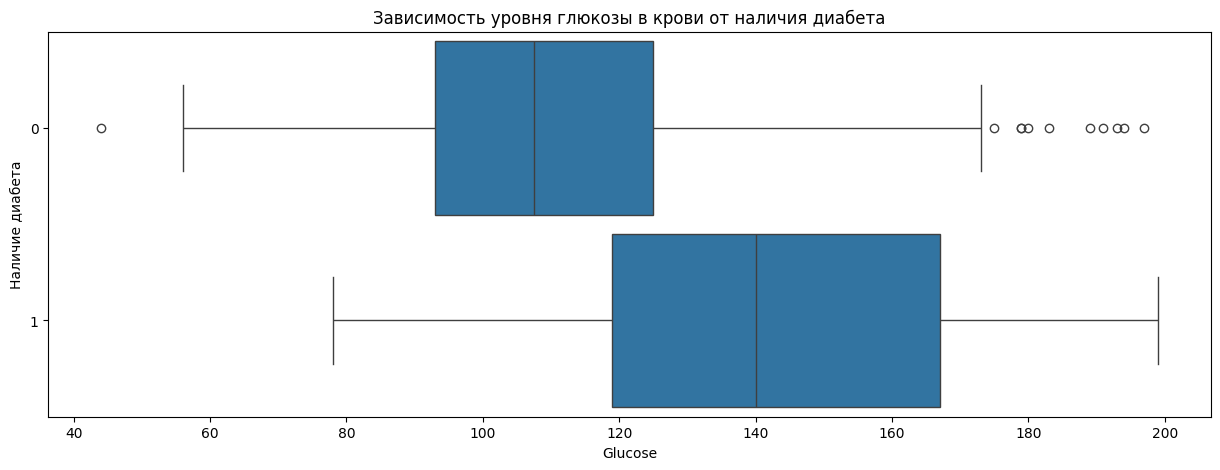

In [359]:
#Проверим как уровень глюкозы влияет на наличие диабета
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes,
    x='Glucose',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Зависимость уровня глюкозы в крови от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')


У людей с сахарным диабетом уровень глюкозы в среднем на 30 единиц выще чем у людей без диабета

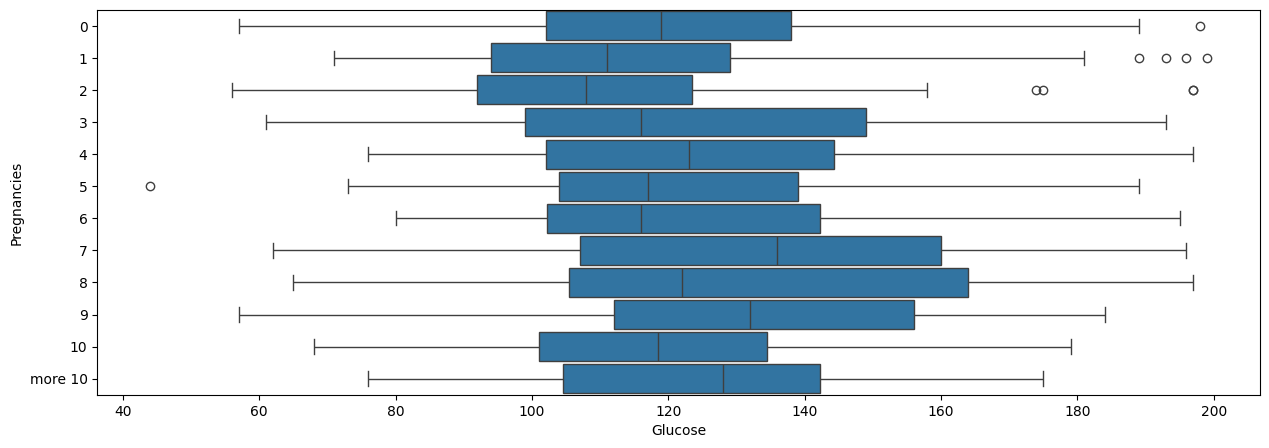

In [360]:
#Проверим как уровень глюкозы в крови зависит от количества беременностей
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes,
    x='Glucose',
    y='Pregnancies',
    orient='h',
    width=0.9
)

Уровень глюкозы не зависит от числа беременностей

Text(0.5, 1.0, 'Распределение по толщине кожи на трицепсе у людей без диабета')

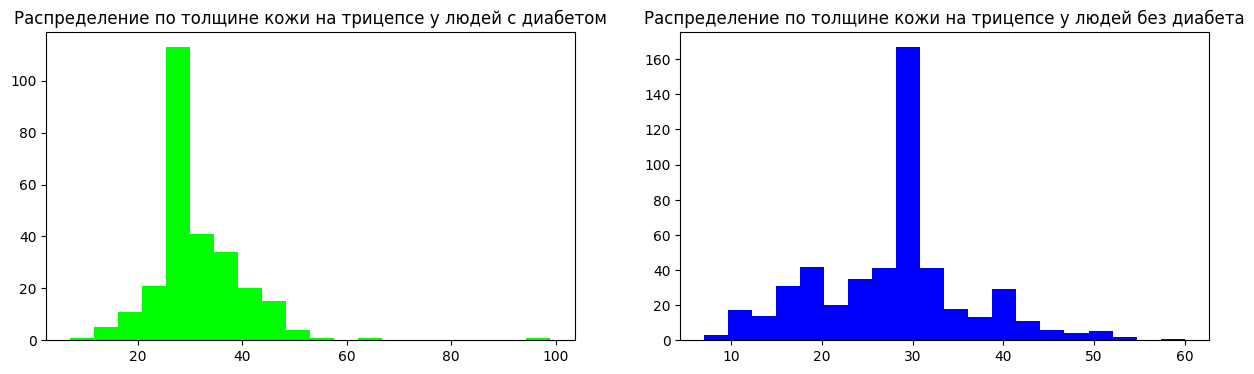

In [361]:
#Проверим как распределение по толщине кожи на трицепсе зависит от наличия диабета
data1 = diabetes[diabetes['Outcome'] == 1]['SkinThickness']
data2 = diabetes[diabetes['Outcome'] == 0]['SkinThickness']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].hist(
    x = data1,
    bins=20,
    color='lime',
    )
axes[0].set_title("Распределение по толщине кожи на трицепсе у людей с диабетом")
axes[1].hist(
     x = data2,
    bins=20,
    color='blue'
)
axes[1].set_title("Распределение по толщине кожи на трицепсе у людей без диабета")



У людей с диабетом кожа на трицепсе тоньше

In [362]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


Text(0, 0.5, 'Наличие диабета')

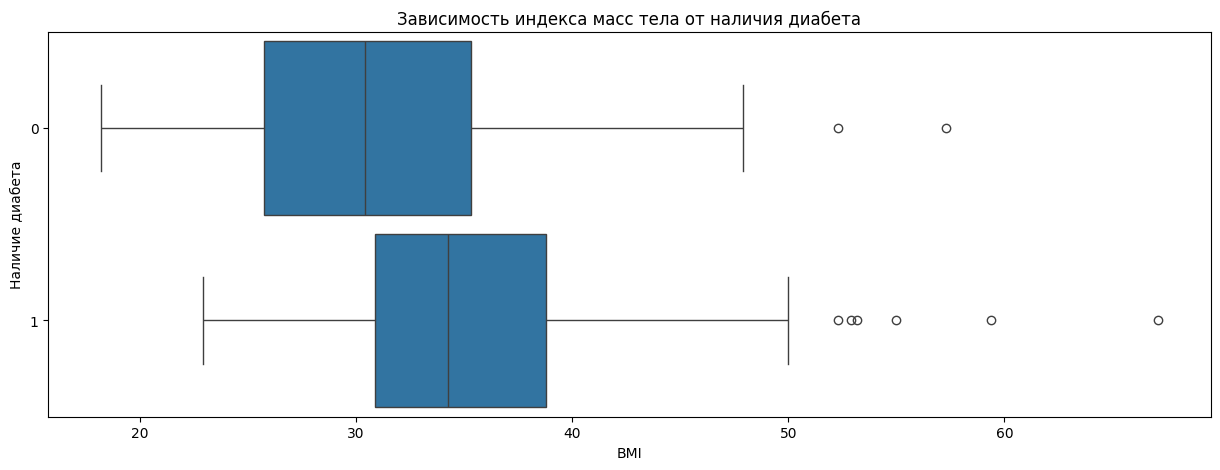

In [363]:
#Проверим зависит ли индекс массы тела от наличия диабета
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes,
    x='BMI',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Зависимость индекса масс тела от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')


Видно что в среднем индекс массы тела у больных с диабетом выше, это значит они чаще страдают от проблем с оишним весом

Text(0.5, 1.0, 'Распредление возраста среди диабетиков')

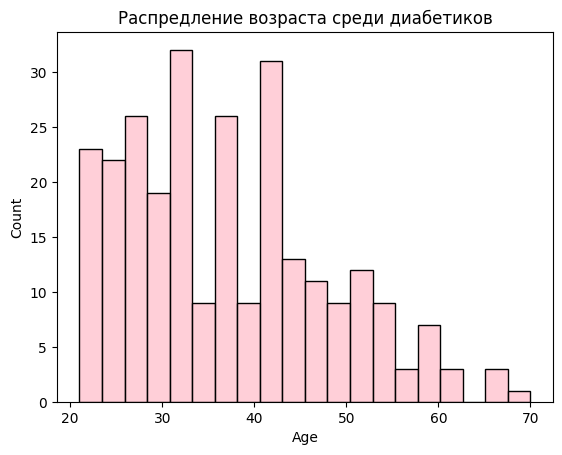

In [364]:
#Посмотрим люди какого возраста чаще подвержену диабету
data = diabetes[diabetes['Outcome'] == 1]['Age']
hist = sns.histplot(
    x=data,
    bins=20,
    color='pink'
)
hist.set_title('Распредление возраста среди диабетиков')

Видно что наблюдения учитывают только людей старше 20 лет
Также можно сказать что после 55 лет число больных диабетов резко падает(возможно связано со смертностью)

Text(0, 0.5, 'Наличие диабета')

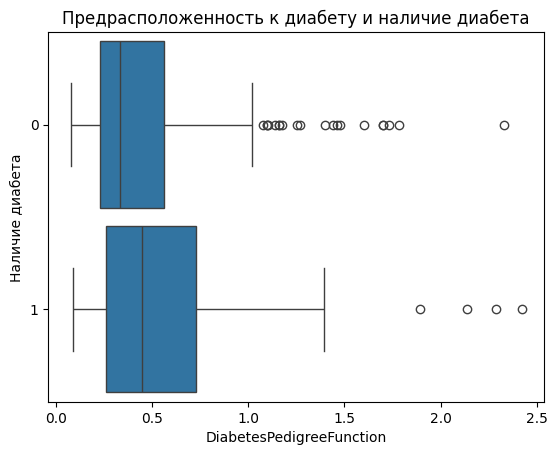

In [365]:
#Проверим как предрасположенностб к диабету влияет на уровень глюкозы

bpxes = sns.boxplot(
    data=diabetes,
    x='DiabetesPedigreeFunction',
    y='Outcome',
    orient='h',
    width=0.9)
bpxes.set_title('Предрасположенность к диабету и наличие диабета')
bpxes.set_ylabel('Наличие диабета')   

Видим что чем выше предрасположенность тем больше шанс заболеть диабетом

In [366]:
#Импортируем второй датасет
table1 = pd.read_csv('data/train.csv')
table2 = pd.read_csv('data/test.csv')
table1.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [367]:
table2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [368]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [369]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [370]:
#Видно что таблицы df_1 является продолжением df_2, конкатенируем их
df_2 = pd.concat([table1, table2], ignore_index=True)

In [371]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

In [372]:
#Находим количестов нулевых значений в столбцах
colls_null_proc = df_2.isnull().mean() * 100
print(colls_null_proc)

id                  0.000000
age                 0.000000
education           2.477584
sex                 0.000000
is_smoking          0.000000
cigsPerDay          0.684285
BPMeds              1.250590
prevalentStroke     0.000000
prevalentHyp        0.000000
diabetes            0.000000
totChol             1.179802
sysBP               0.000000
diaBP               0.000000
BMI                 0.448325
heartRate           0.023596
glucose             9.155262
TenYearCHD         20.009438
dtype: float64


In [373]:
#Обозначим пропуски как Nan для количесственныз признаков для работы с методами по их устранению 
df_2['BPMeds'] = df_2['BPMeds'].apply(lambda x: np.nan if x == 0 else x)
df_2['totChol'] = df_2['totChol'].apply(lambda x: np.nan if x == 0 else x)
df_2['BMI'] = df_2['BMI'].apply(lambda x: np.nan if x == 0 else x)
df_2['heartRate'] = df_2['heartRate'].apply(lambda x: np.nan if x == 0 else x)
df_2['glucose'] = df_2['glucose'].apply(lambda x: np.nan if x == 0 else x)
df_2['TenYearCHD'] = df_2['TenYearCHD'].apply(lambda x: np.nan if x == 0 else x)


In [374]:
df_2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,NaN,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,NaN,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,NaN
2,2,46,1.0,F,YES,10.0,NaN,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,NaN
3,3,50,1.0,M,YES,20.0,NaN,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,NaN,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,NaN


In [375]:
#Создадим словарь для заполнения пропусков и заполним их
fillna_dict2 = {'education': df_2['education'].mode(),
                'cigsPerDay': df_2['cigsPerDay'].mode(),
                'BPMeds': df_2['BPMeds'].median(),
                'totChol': df_2['totChol'].median(),
                'BMI': df_2['BMI'].median(),
                'heartRate': df_2['heartRate'].median(),
                'glucose': df_2['glucose'].median(),
                'TenYearCHD': df_2['TenYearCHD'].median(),
                }
df_2 = df_2.fillna(fillna_dict2)

In [376]:
colls_null_proc = df_2.isnull().mean() * 100
print(colls_null_proc)

id                 0.000000
age                0.000000
education          2.477584
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.684285
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.000000
sysBP              0.000000
diaBP              0.000000
BMI                0.000000
heartRate          0.000000
glucose            0.000000
TenYearCHD         0.000000
dtype: float64


In [377]:
#Столбew education и являются категориальными признаками, изменим тип данных в этих столбца
df_2['education'] = df_2['education'].astype('category')

In [378]:
df_2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,1.0,0,0,0,221.0,148.0,85.0,25.40,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,1.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,1.0
2,2,46,1.0,F,YES,10.0,1.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1.0
3,3,50,1.0,M,YES,20.0,1.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,1.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,1.0


Опишем столбцы:
• sex : мужской или женский («М» или «Ж»)
• age : возраст пациента (непрерывный — хотя зарегистрированный возраст был усечен до целых чисел, понятие возраста является непрерывным)
Поведенческие данные
• is_smoking курит ли пациент в настоящее время («ДА» или «НЕТ») 
• cigsPerDay : количество сигарет, которые человек выкуривает в среднем за один день (можно считать непрерывным, так как можно выкурить любое количество сигарет, даже половину сигареты).
• BPMeds : принимал ли пациент лекарства от давления (номинально) 
• prevalentStroke: перенес ли пациент инсульт ранее (номинально) 
• prevalentHyp	 : был ли у пациента гипертония (номинально) 
• diabetes: был ли у пациента диабет (номинально) Медицинские данные (текущие) 
• totChol : уровень общего холестерина (непрерывный) 
• sysBP : систолическое артериальное давление (непрерывно)  • diaBP : диастолическое артериальное давление (непрерывно) 
• BMI : индекс массы тела (непрерывно) 
• heartRate : частота сердечных сокращений (непрерывно - в медицинских исследованиях такие переменные, как частота сердечных сокращений, хотя на самом деле дискретны, тем не менее считаются непрерывными из-за большого количества возможных значений.) 
• glucose: уровень глюкозы (непрерывно) Прогнозируемая переменная (желаемая цель) 
• 10-летний риск ишемической болезни сердца (ИБС) (бинарный: «1» означает «Да», «0» означает «Нет»)10-летний риск ишемической болезни сердца (ИБС) (бинарный: «1» означает «Да», «0» означает «Нет»)

In [379]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Видим что с первым датасетом общими являются столбцы: age, BMI, glucose

In [380]:
#Обьединим 1 и 2 датасет
merged = diabetes.merge(
    df_2.rename(columns={'glucose': 'Glucose', 'diaBP': 'BloodPressure', 'age': 'Age', 'diabetes': 'Outcome'}),
    how = 'outer',
    on=['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']
    )

In [381]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   5006 non-null   float64 
 2   BloodPressure             5006 non-null   float64 
 3   SkinThickness             768 non-null    float64 
 4   BMI                       5006 non-null   float64 
 5   DiabetesPedigreeFunction  768 non-null    float64 
 6   Age                       5006 non-null   int64   
 7   Outcome                   5006 non-null   int64   
 8   id                        4238 non-null   float64 
 9   education                 4133 non-null   category
 10  sex                       4238 non-null   object  
 11  is_smoking                4238 non-null   object  
 12  cigsPerDay                4209 non-null   float64 
 13  BPMeds                    4238 non-null   float6

In [382]:
merged.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,id,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate,TenYearCHD
0,NaN,40.0,79.0,NaN,21.38,NaN,43,0,1315.0,2.0,M,YES,43.0,1.0,0.0,0.0,240.0,126.0,88.0,1.0
1,NaN,40.0,106.0,NaN,38.88,NaN,57,0,3907.0,1.0,F,NO,0.0,1.0,0.0,1.0,233.0,184.0,66.0,1.0
2,NaN,43.0,80.0,NaN,23.97,NaN,38,0,1783.0,4.0,M,NO,0.0,1.0,0.0,0.0,240.0,122.5,60.0,1.0
3,5,44.0,62.0,29.0,25.00,0.587,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,44.0,72.0,NaN,21.48,NaN,59,0,1578.0,1.0,M,YES,40.0,1.0,0.0,1.0,188.0,111.0,75.0,1.0


In [383]:
#Уберём признаки в которых больше 30% пропусков
tresh = merged.shape[0] * 0.7
merged = merged.dropna(axis=1, thresh=tresh)


In [384]:
#удалим столбец про курение, так как у нас уже есть столбец с количеством сигарет за день.
#Также удалим ненужный столбец id
merged = merged.drop(['id', 'is_smoking'], axis=1)

In [385]:
#Создаём словарь для заполнения пропусков
fillna_dict3 = {
    'education': merged['education'].mode()[0],
    'sex': merged['sex'].mode()[0],
    'cigsPerDay': merged['cigsPerDay'].median(),
    'BPMeds': merged['BPMeds'].mode()[0],
    'prevalentStroke': merged['prevalentStroke'].mode()[0],
    'prevalentHyp': merged['prevalentHyp'].mode()[0],
    'totChol': merged['totChol'].median(),
    'sysBP': merged['sysBP'].median(),
    'heartRate': merged['heartRate'].median(),
    'TenYearCHD': merged['TenYearCHD'].mode()[0]
}
#Заполняем пропуски
merged.fillna(fillna_dict3)

,Glucose,BloodPressure,BMI,Age,Outcome,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate,TenYearCHD
0,40.0,79.0,21.38,43,0,2.0,M,43.0,1.0,0.0,0.0,240.0,126.0,88.0,1.0
1,40.0,106.0,38.88,57,0,1.0,F,0.0,1.0,0.0,1.0,233.0,184.0,66.0,1.0
2,43.0,80.0,23.97,38,0,4.0,M,0.0,1.0,0.0,0.0,240.0,122.5,60.0,1.0
3,44.0,62.0,25.00,36,0,1.0,F,0.0,1.0,0.0,0.0,234.0,128.0,75.0,1.0
4,44.0,72.0,21.48,59,0,1.0,M,40.0,1.0,0.0,1.0,188.0,111.0,75.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,368.0,110.0,37.62,62,1,3.0,F,20.0,1.0,0.0,1.0,358.0,215.0,110.0,1.0
5002,370.0,78.0,24.90,64,1,3.0,M,0.0,1.0,0.0,1.0,195.0,176.0,95.0,1.0
5003,386.0,87.0,21.34,62,1,1.0,F,0.0,1.0,0.0,0.0,233.0,130.0,85.0,1.0
5004,394.0,66.5,17.17,62,1,3.0,M,0.0,1.0,0.0,0.0,346.0,102.5,80.0,1.0


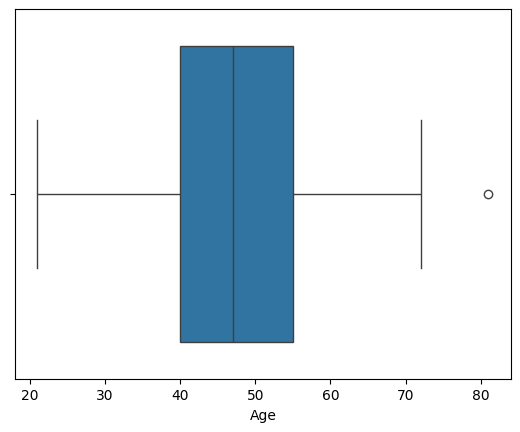

In [386]:
#Проверим признаки на наличие выбросов с помощью sns.boxplot
test_box = sns.boxplot(
    data=merged,
    x='Age'
)

Выбросы незначительны

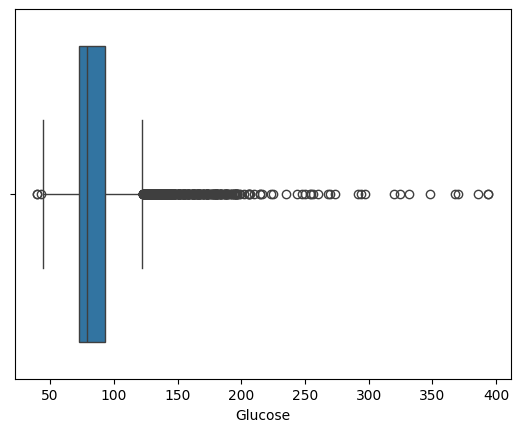

In [387]:
test_box = sns.boxplot(
    data=merged,
    x='Glucose'
)

Видим что по уровню глюкозы мноого выбросов, это связано с большим количеством диабетиков в выборке(формируется две группы - люди с обычным уровнем глюкозы и с повышенным) Эти выбросы убирать нельзя

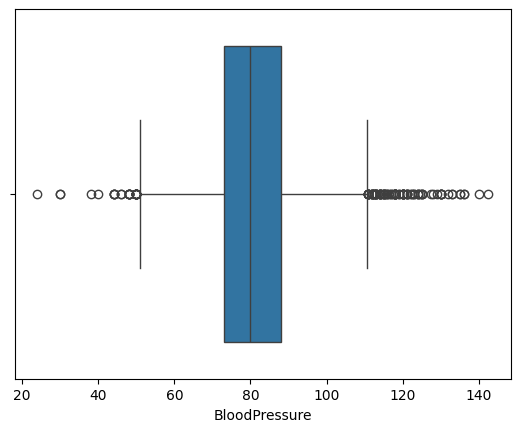

In [388]:
test_box = sns.boxplot(
    data=merged,
    x='BloodPressure'
)

In [389]:
#Наблюдаем множество выбросов по признаку кровяное давление
#Применим функцию очистки по методу Тьюки к таблице и признаку BloodPressure
#Задаём функцию для вызова метода Тьюки
def outliers_iqr_mod(data, feature, n_iqr=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * n_iqr)
    upper_bound = quartile_3 + (iqr * n_iqr)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
#Вызываем метод Тьюки
outliers, merged_cleaned = outliers_iqr_mod(merged, 'BloodPressure')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {merged_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 121
Результирующее число записей: 4885


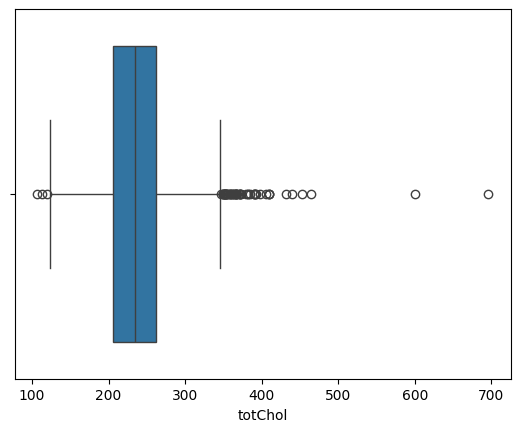

In [390]:
test_box = sns.boxplot(
    data=merged,
    x='totChol'
)

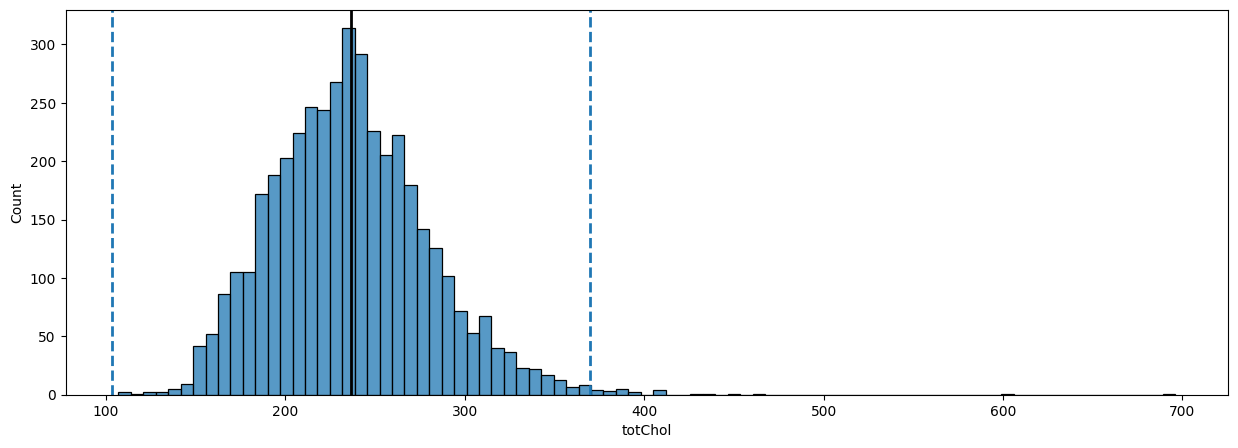

In [391]:
#Видим большое количество выбросов с повышенным холестерином, построим диаграмму рассеиния для более понятного восприятия
fig = plt.figure(figsize=(15, 5))
dia = sns.histplot(
    data=mergedd_cleaned,
    x='totChol'
)
dia.axvline(mergedd_cleaned['totChol'].mean(), lw=2, color='k')
dia.axvline(mergedd_cleaned['totChol'].mean() + 3 * mergedd_cleaned['totChol'].std(), lw=2, ls='--')
dia.axvline(mergedd_cleaned['totChol'].mean() - 3 * mergedd_cleaned['totChol'].std(), lw=2, ls='--')

Видим что распределение является нормальным, выбросы можно отбросить по методу z-отклонений

In [392]:
#Задаём метод z-отклонений
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
#Вызываем метод для признака totChol
outliers, merged_cleaned2 = outliers_z_score_mod(merged_cleaned, 'totChol')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {merged_cleaned2.shape[0]}')


Число выбросов по методу z-отклонения: 25
Результирующее число записей: 4123


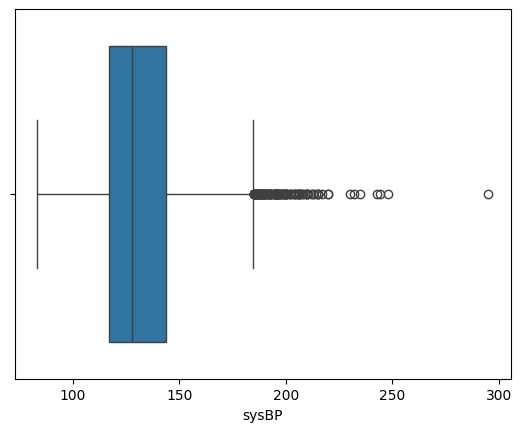

In [393]:
test_box = sns.boxplot(
    data=merged,
    x='sysBP'
)

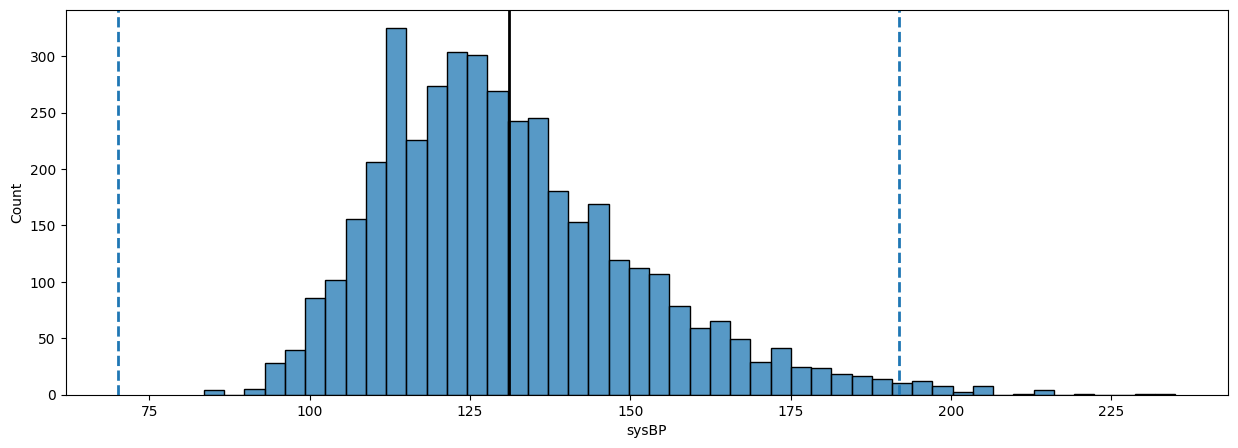

In [394]:
#Видим большое число выбросов
#Построим диаграмму рассеиния с границами по методу z отклонений
fig = plt.figure(figsize=(15, 5))
dia = sns.histplot(
    data=merged_cleaned2,
    x='sysBP'
)
dia.axvline(merged_cleaned2['sysBP'].mean(), lw=2, color='k')
dia.axvline(merged_cleaned2['sysBP'].mean() + 3 * merged_cleaned2['sysBP'].std(), lw=2, ls='--')
dia.axvline(merged_cleaned2['sysBP'].mean() - 3 * merged_cleaned2['sysBP'].std(), lw=2, ls='--')

In [395]:
#Видим что выбросы можно отбросить
#Вызываем метод z отклонений
#Вызываем метод для признака totChol
outliers, merged_cleaned3 = outliers_z_score_mod(merged_cleaned2, 'sysBP')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {merged_cleaned3.shape[0]}')

Число выбросов по методу z-отклонения: 44
Результирующее число записей: 4079


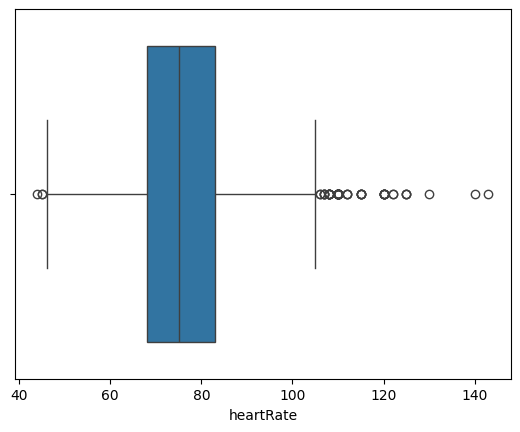

In [396]:
test_box = sns.boxplot(
    data=merged,
    x='heartRate'
)

In [397]:
#Видим большое количество выбросов справа из-за повышения пульса пациента при изиерении(пациенты волновались)
#Для отброса признаков справа нам понадобится расширенный метод Тьюки:
#Задаём функцию для вызова метода Тьюки
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
#Вф\ызываем расширенный метод Тьюки
outliers, merged_cleaned4 = outliers_iqr_mod(merged_cleaned3, 'heartRate', left=2.5, right=1.5)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {merged_cleaned4.shape[0]}')

Число выбросов по методу Тьюки: 80
Результирующее число записей: 3999


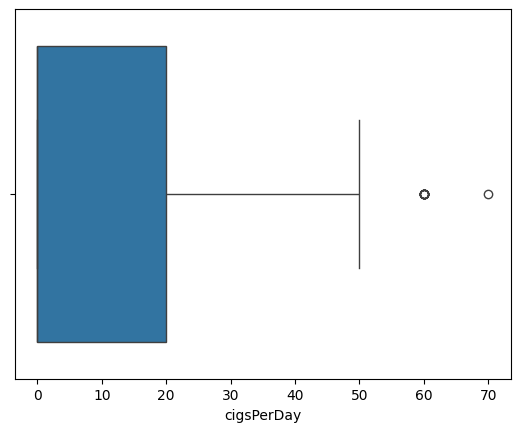

In [398]:
test_box = sns.boxplot(
    data=merged,
    x='cigsPerDay'
)

In [399]:
#Видим несколько больших аномальных выбросов
#Вызываем метод Тьюки
outliers, merged_cleaned5 = outliers_iqr_mod(merged_cleaned4, 'cigsPerDay')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {merged_cleaned5.shape[0]}')

Число выбросов по методу Тьюки: 12
Результирующее число записей: 3961


In [400]:
merged_cleaned5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 5004
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Glucose          3961 non-null   float64 
 1   BloodPressure    3961 non-null   float64 
 2   BMI              3961 non-null   float64 
 3   Age              3961 non-null   int64   
 4   Outcome          3961 non-null   int64   
 5   education        3861 non-null   category
 6   sex              3961 non-null   object  
 7   cigsPerDay       3961 non-null   float64 
 8   BPMeds           3961 non-null   float64 
 9   prevalentStroke  3961 non-null   float64 
 10  prevalentHyp     3961 non-null   float64 
 11  totChol          3961 non-null   float64 
 12  sysBP            3961 non-null   float64 
 13  heartRate        3961 non-null   float64 
 14  TenYearCHD       3961 non-null   float64 
dtypes: category(1), float64(11), int64(2), object(1)
memory usage: 468.2+ KB


In [401]:
#Признаки sex и Outcome являются категориальными, изменим информацию о них
merged_cleaned5['sex'] = merged_cleaned5['sex'].astype('category')
merged_cleaned5['Outcome'] = merged_cleaned5['Outcome'].astype('category')
#Уберём столбец TenYearCHD т.к. он имеет мало отношения к диабету
merged_cleaned5.drop('TenYearCHD', axis=1, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\885222806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned5['sex'] = merged_cleaned5['sex'].astype('category')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\885222806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned5['Outcome'] = merged_cleaned5['Outcome'].astype('category')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\885222806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Начиаем анализ обьединённых первого и второго датасетов

In [402]:
diabetes2 = merged_cleaned5.copy()

In [403]:
diabetes2.head()

,Glucose,BloodPressure,BMI,Age,Outcome,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate
0,40.0,79.0,21.38,43,0,2.0,M,43.0,1.0,0.0,0.0,240.0,126.0,88.0
1,40.0,106.0,38.88,57,0,1.0,F,0.0,1.0,0.0,1.0,233.0,184.0,66.0
2,43.0,80.0,23.97,38,0,4.0,M,0.0,1.0,0.0,0.0,240.0,122.5,60.0
4,44.0,72.0,21.48,59,0,1.0,M,40.0,1.0,0.0,1.0,188.0,111.0,75.0
5,44.0,87.0,21.48,42,0,3.0,M,20.0,1.0,0.0,0.0,231.0,123.0,75.0


Text(0, 0.5, 'Наличие диабета')

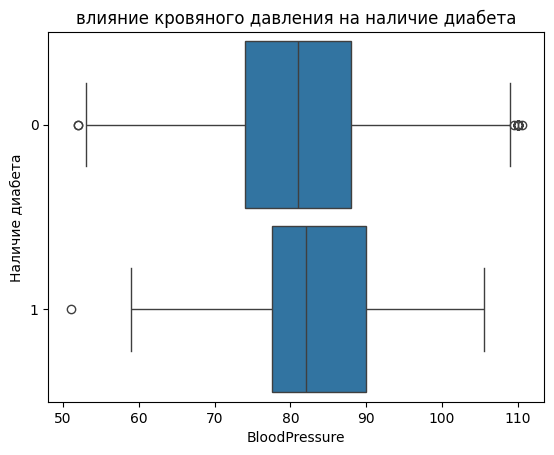

In [404]:
#Перепроверим как как кровянное давление влияет на наличие диабета
boxe = sns.boxplot(
    data=diabetes2,
    x='BloodPressure',
    y='Outcome',
    orient='h',
    width=0.9)
boxe.set_title('влияние кровяного давления на наличие диабета')
boxe.set_ylabel('Наличие диабета')   

Взаимосвязь отсутствует

Text(0, 0.5, 'Наличие диабета')

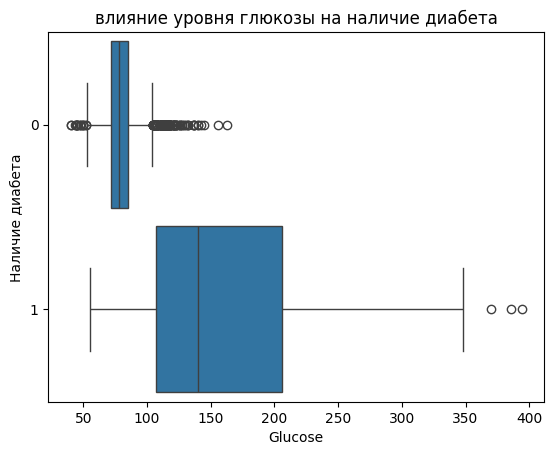

In [405]:
#Проверим зависимость наличия диабета от уровня глюкозы в новом датасете
box = sns.boxplot(
    data=diabetes2,
    x='Glucose',
    y='Outcome',
    orient='h',
    width=0.9)
box.set_title('влияние уровня глюкозы на наличие диабета')
box.set_ylabel('Наличие диабета')   

Уовень глюкозы в крови диабетиков выше, эта зависимость стала более выраженной

Text(0, 0.5, 'Наличие диабета')

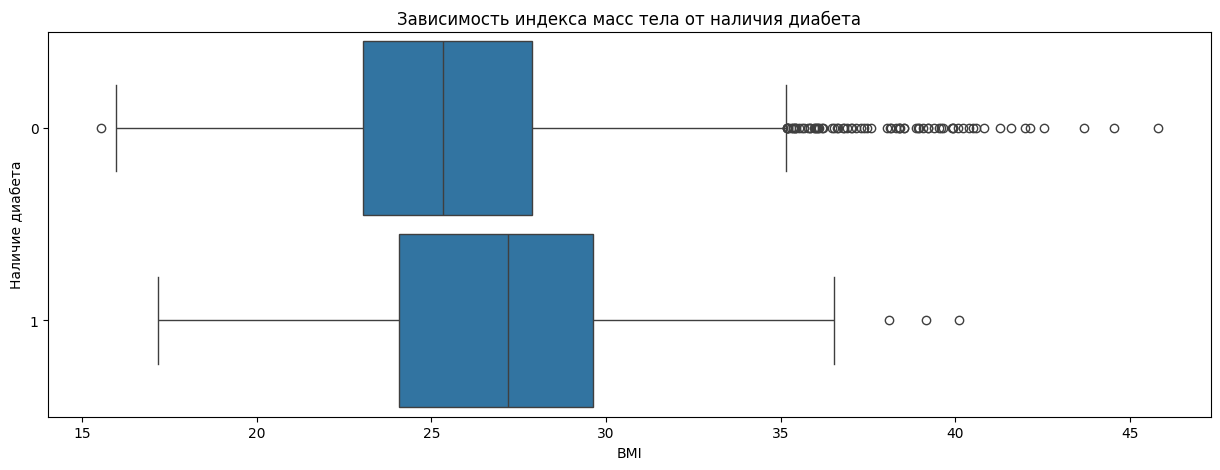

In [406]:
#Проверим зависит ли индекс массы тела от наличия диабета
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes2,
    x='BMI',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Зависимость индекса масс тела от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')


Индекс массы тела у диабетиков выше чем у здоровых пациентов, эта зависимость сохранилась

Text(0.5, 1.0, 'Распредление возраста среди диабетиков')

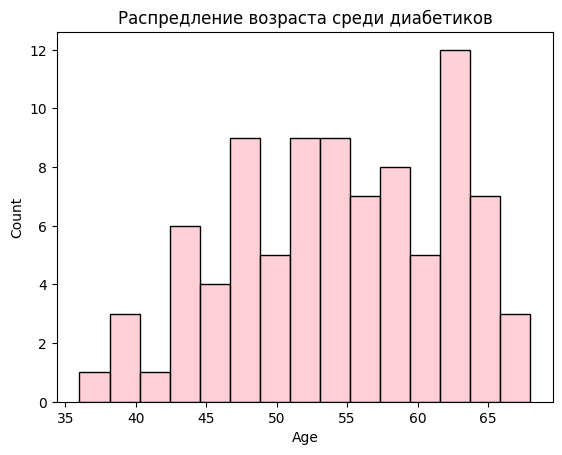

In [407]:
#Перепроверим распределение возраста среди диабетиков
data = diabetes2[diabetes2['Outcome'] == 1]['Age']
hist = sns.histplot(
    x=data,
    bins=15,
    color='pink'
)
hist.set_title('Распредление возраста среди диабетиков')

Видим что сохраняется тенденция к повышению заболеваемости в среднем и пожилом возрасте

Text(0.5, 1.0, 'Холестерин у людей без диабета')

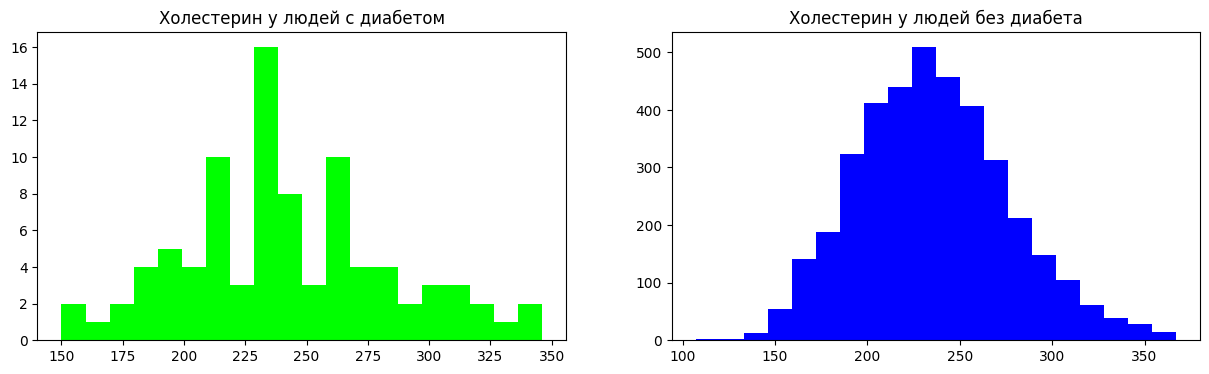

In [408]:
#Проверим взаимосвязь между уровнем холестерина и наличием диабета
data1 = diabetes2[diabetes2['Outcome'] == 1]['totChol']
data2 = diabetes2[diabetes2['Outcome'] == 0]['totChol']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].hist(
    x = data1,
    bins=20,
    color='lime',
    )
axes[0].set_title("Холестерин у людей с диабетом")
axes[1].hist(
     x = data2,
    bins=20,
    color='blue'
)
axes[1].set_title("Холестерин у людей без диабета")

Text(0, 0.5, 'Наличие диабета')

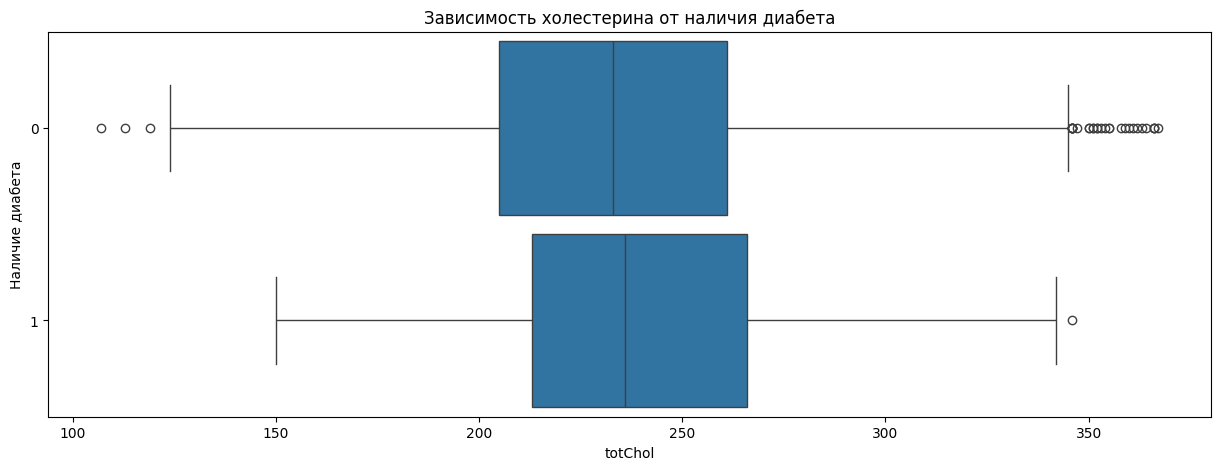

In [409]:
#Также проверим эту зависимость на коробчатой диаграме
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes2,
    x='totChol',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Зависимость холестерина от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')

Мы убедились что взаимосвязь отсутствует

Text(0.5, 1.0, 'Систолическое давление у людей без диабета')

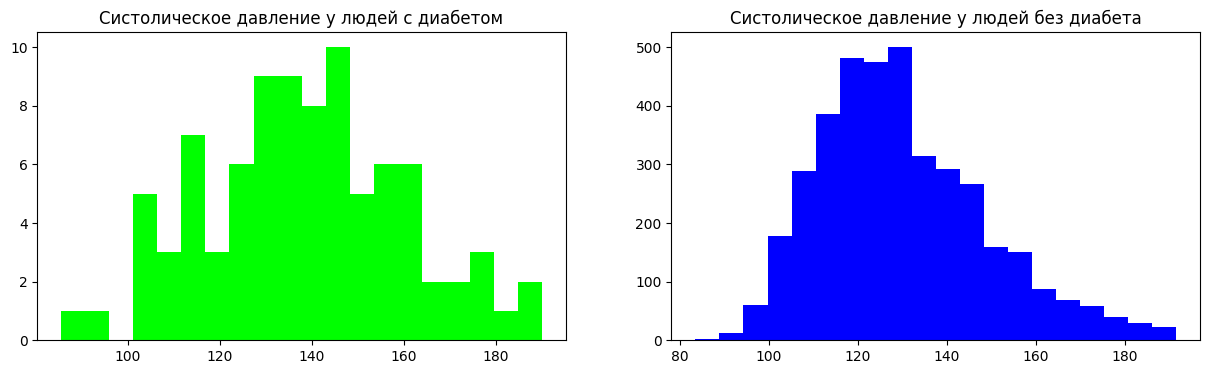

In [410]:
#Проверим взаимосвязь между дисатолическим давлением и наличием диабета
data1 = diabetes2[diabetes2['Outcome'] == 1]['sysBP']
data2 = diabetes2[diabetes2['Outcome'] == 0]['sysBP']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes[0].hist(
    x = data1,
    bins=20,
    color='lime',
    )
axes[0].set_title("Систолическое давление у людей с диабетом")
axes[1].hist(
     x = data2,
    bins=20,
    color='blue'
)
axes[1].set_title("Систолическое давление у людей без диабета")


Text(0, 0.5, 'Наличие диабета')

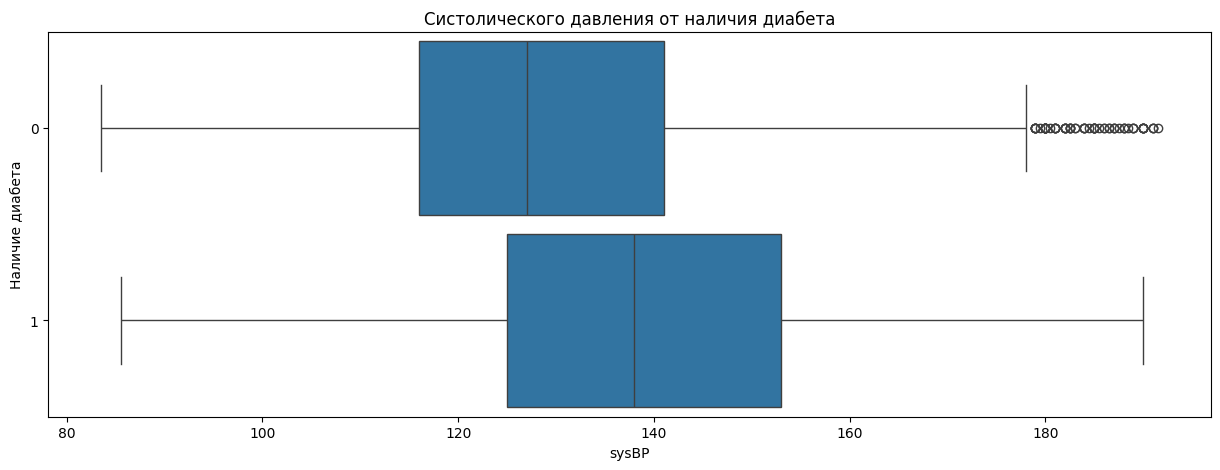

In [411]:
#Также проверим эту ависимость на коробчатой диаграмме
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes2,
    x='sysBP',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Систолического давления от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')

Видим что у диабетиков систолическое давление повышено

In [412]:
diabetes2.head()

,Glucose,BloodPressure,BMI,Age,Outcome,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate
0,40.0,79.0,21.38,43,0,2.0,M,43.0,1.0,0.0,0.0,240.0,126.0,88.0
1,40.0,106.0,38.88,57,0,1.0,F,0.0,1.0,0.0,1.0,233.0,184.0,66.0
2,43.0,80.0,23.97,38,0,4.0,M,0.0,1.0,0.0,0.0,240.0,122.5,60.0
4,44.0,72.0,21.48,59,0,1.0,M,40.0,1.0,0.0,1.0,188.0,111.0,75.0
5,44.0,87.0,21.48,42,0,3.0,M,20.0,1.0,0.0,0.0,231.0,123.0,75.0


In [413]:
diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Glucose          3961 non-null   float64 
 1   BloodPressure    3961 non-null   float64 
 2   BMI              3961 non-null   float64 
 3   Age              3961 non-null   int64   
 4   Outcome          3961 non-null   category
 5   education        3861 non-null   category
 6   sex              3961 non-null   category
 7   cigsPerDay       3961 non-null   float64 
 8   BPMeds           3961 non-null   float64 
 9   prevalentStroke  3961 non-null   float64 
 10  prevalentHyp     3961 non-null   float64 
 11  totChol          3961 non-null   float64 
 12  sysBP            3961 non-null   float64 
 13  heartRate        3961 non-null   float64 
dtypes: category(3), float64(10), int64(1)
memory usage: 383.4 KB


In [414]:
#Изучим признак prevalentStroke
diabetes2['prevalentStroke'].value_counts()
diabetes2['prevalentStroke'] = diabetes2['prevalentStroke'].astype('float')

In [415]:
diabetes2.groupby('Outcome')['prevalentStroke'].mean()*100

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\2819255161.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes2.groupby('Outcome')['prevalentStroke'].mean()*100


Outcome
0    0.594008
1    1.123596
Name: prevalentStroke, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\4004908980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = diabetes2.groupby('Outcome')['prevalentStroke'].mean()*100


Text(0.5, 0, 'Наличие диабета')

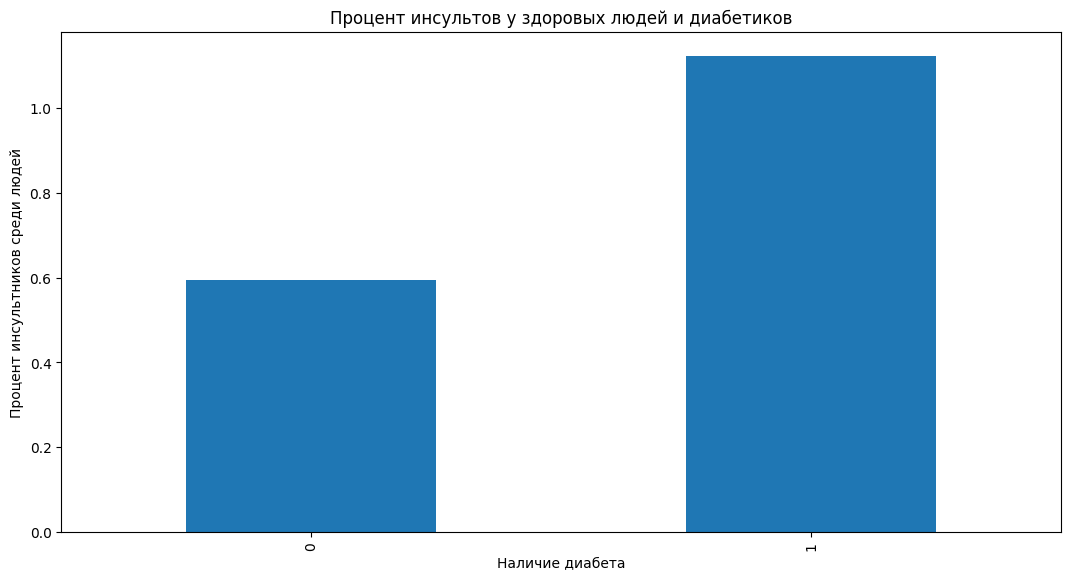

In [416]:
#Проверим есть ли взаимосвязь между количеством инсультов и наличием диабета
diabetes2['prevalentStroke'] = diabetes2['prevalentStroke'].apply(pd.to_numeric)
data = diabetes2.groupby('Outcome')['prevalentStroke'].mean()*100
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0, 0, 1, 1])
data.plot(kind='bar')
axes.set_title("Процент инсультов у здоровых людей и диабетиков")
axes.set_ylabel('Процент инсультников среди людей')
axes.set_xlabel('Наличие диабета')

Видим что инсульт среди диабетиков встречается в два раза чаще

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10560\4262542597.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = diabetes2.groupby('Outcome')['prevalentHyp'].mean()*100


Text(0.5, 0, 'Наличие дааибета')

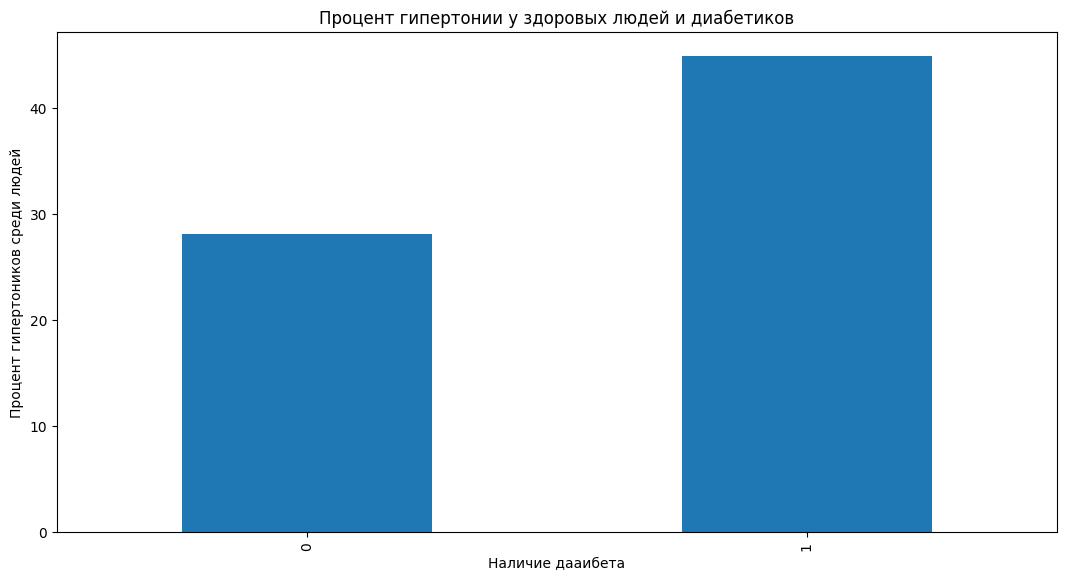

In [417]:
#Проверим есть ли взаимосвязь между наличием гипертонии и наличием диабета
diabetes2['prevalentHyp'] = diabetes2['prevalentHyp'].apply(pd.to_numeric)
data = diabetes2.groupby('Outcome')['prevalentHyp'].mean()*100
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0, 0, 1, 1])
data.plot(kind='bar')
axes.set_title("Процент гипертонии у здоровых людей и диабетиков")
axes.set_ylabel('Процент гипертоников среди людей')
axes.set_xlabel('Наличие дааибета')

Процент гипертоников выше среди диабетиков

Text(0.5, 1.0, 'соотношение пола среди диабетиков')

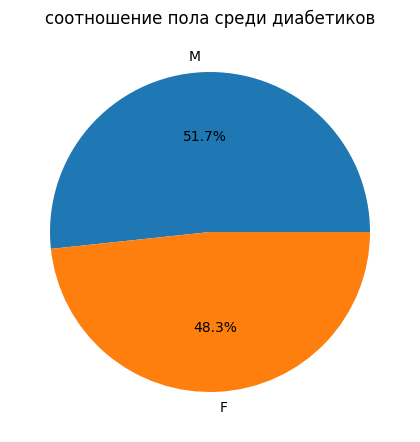

In [418]:
#Проверим влияние пола на наличие диабета
data = diabetes2[diabetes2['Outcome'] == 1]['sex'].value_counts()
fig = plt.figure(figsize=(12,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(data, labels = data.index, autopct='%.1f%%')
axes.set_title('соотношение пола среди диабетиков')

Видим что соотношение полов почти равное

ИМПОРТИРУЕМ ТРЕТИЙ ДАТАСЕТ

In [419]:
diabetes_binary_health = pd.read_csv('data\diabetes_binary_health_indicators_BRFSS2015.csv', sep=',')

In [420]:
diabetes_binary_health.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [421]:
diabetes_binary_health.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [422]:
diabetes_binary5050 = pd.read_csv('data\diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [423]:
diabetes_binary5050.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [424]:
diabetes_binary5050.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [425]:
#Видим что вторая таблица является продолжением второй
#Обьеденим их конкатинацией
df_3 = pd.concat([diabetes_binary5050, diabetes_binary_health], ignore_index=True)

In [426]:
diabetes2.head()

,Glucose,BloodPressure,BMI,Age,Outcome,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,heartRate
0,40.0,79.0,21.38,43,0,2.0,M,43.0,1.0,0.0,0.0,240.0,126.0,88.0
1,40.0,106.0,38.88,57,0,1.0,F,0.0,1.0,0.0,1.0,233.0,184.0,66.0
2,43.0,80.0,23.97,38,0,4.0,M,0.0,1.0,0.0,0.0,240.0,122.5,60.0
4,44.0,72.0,21.48,59,0,1.0,M,40.0,1.0,0.0,1.0,188.0,111.0,75.0
5,44.0,87.0,21.48,42,0,3.0,M,20.0,1.0,0.0,0.0,231.0,123.0,75.0


In [427]:
df_3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [428]:
#df_3 имеет общие столбцы c diabetes2:
#BMI - названия столбцов совпадают.
#Age - названия столбцов совпадают.
#Education из df_3 и education из diabetes2
#prevalentStroke из diabetes и Stroke из df_3
#prevalentHyp из diabetes и HighBP из df_3

In [429]:
#df_3 и diabetes2 имеют столбцы которые нужно привести к общему виду:
#Sex из df_3(использует 1 и 0) и sex из diabetes2(использует значения M и F).
#В df_3 есть бинарный столбец HighChol(1 - повышен и 0 - в норме) 
#В diabetes2 есть столбец totChol, он показывает уровень холестерина, его нужно проклассифицировать 

In [430]:
#Приведём столбец sex из diabetes2 к нужному виду
diabetes2['Sex'] = diabetes2['sex'].apply(lambda x: 1 if x == 'M' else 0)
#Удаляем старый столбец
diabetes2.drop('sex', inplace=True, axis = 1)


In [431]:
#Общий уровень холестерина должен быть ниже 200 мг/дл
#Классифицируем столбец totChol 
diabetes2['HighChol'] = diabetes2['totChol'].apply(lambda x: 1 if x >=200 else 0)
#Удаляем старый столбец
diabetes2.drop('totChol', inplace=True, axis = 1)

In [432]:
#Обьединим датасеты
diabetes3 = diabetes2.merge(
    df_3.rename(columns={'Education': 'education', 'Stroke': 'prevalentStroke', 'Diabetes_binary': 'Outcome'}),
    how = 'outer',
    on=['education', 'Sex', 'BMI', 'Age', 'Outcome', 'prevalentStroke', 'HighChol']
    )
display(diabetes3)

,Glucose,BloodPressure,BMI,Age,Outcome,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Income
0,NaN,NaN,14.00,12.0,0.0,1.0,NaN,NaN,0.0,NaN,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
1,NaN,NaN,14.00,12.0,0.0,1.0,NaN,NaN,0.0,NaN,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
2,68.0,88.5,16.48,37.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78.0,90.0,16.61,48.0,0.0,1.0,2.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74.0,78.0,16.92,63.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328328,248.0,74.0,32.52,52.0,1.0,NaN,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328329,80.0,90.0,32.63,36.0,0.0,NaN,20.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328330,92.0,86.5,33.76,55.0,0.0,NaN,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328331,95.0,77.5,33.99,48.0,0.0,NaN,40.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
#Уберём признаки в которых больше 30% пропусков
tresh = diabetes3.shape[0] * 0.7
diabetes3 = diabetes3.dropna(axis=1, thresh=tresh)

In [434]:
diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328333 entries, 0 to 328332
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BMI                   328333 non-null  float64
 1   Age                   328333 non-null  float64
 2   Outcome               328333 non-null  float64
 3   education             328233 non-null  float64
 4   prevalentStroke       328333 non-null  float64
 5   Sex                   328333 non-null  float64
 6   HighChol              328333 non-null  float64
 7   HighBP                324372 non-null  float64
 8   CholCheck             324372 non-null  float64
 9   Smoker                324372 non-null  float64
 10  HeartDiseaseorAttack  324372 non-null  float64
 11  PhysActivity          324372 non-null  float64
 12  Fruits                324372 non-null  float64
 13  Veggies               324372 non-null  float64
 14  HvyAlcoholConsump     324372 non-null  float64
 15  

In [435]:
#Находим количестов нулевых значений в столбцах
colls_null_proc = df_2.isnull().mean() * 100
print(colls_null_proc)

id                 0.000000
age                0.000000
education          2.477584
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.684285
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.000000
sysBP              0.000000
diaBP              0.000000
BMI                0.000000
heartRate          0.000000
glucose            0.000000
TenYearCHD         0.000000
dtype: float64


In [436]:
#Удалим столбец education т.к. он не относится к диабету
diabetes3.drop('education', axis = 1, inplace=True)

Начнём третий анализ данных

In [437]:
diabetes3.head()

,BMI,Age,Outcome,prevalentStroke,Sex,HighChol,HighBP,CholCheck,Smoker,HeartDiseaseorAttack,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Income
0,14.00,12.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
1,14.00,12.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
2,16.48,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.61,48.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.92,63.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
#Перед визуализацией применим метод Тьюки к признаку BMI
outliers, diabetes3 = outliers_iqr_mod(diabetes3, 'BMI')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {diabetes3.shape[0]}')

Число выбросов по методу Тьюки: 8193
Результирующее число записей: 320140


Text(0, 0.5, 'Наличие диабета')

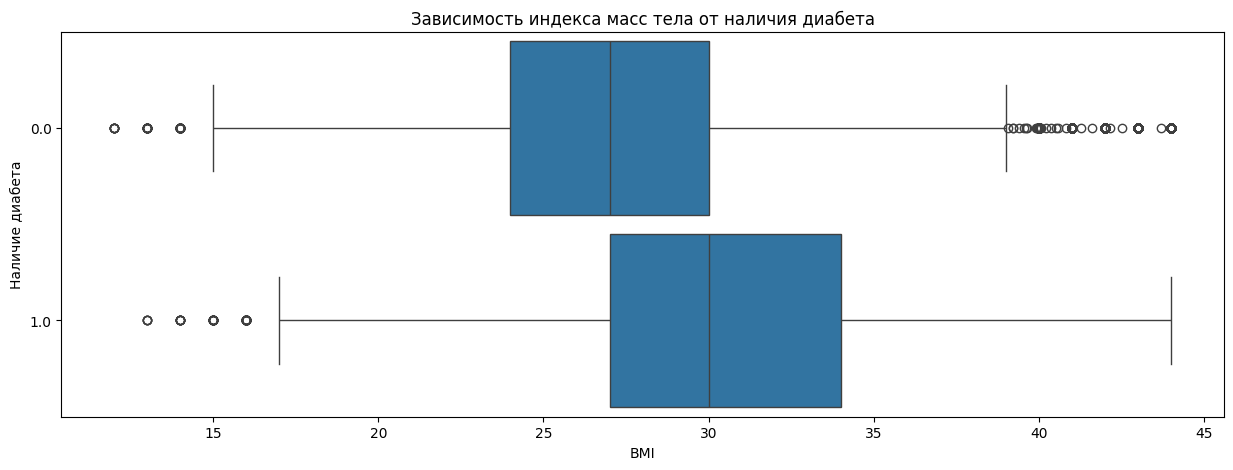

In [439]:
#Перепроверим зависит ли индекс массы тела от наличия диабета
fig = plt.figure(figsize=(15,5))
diagram_box = sns.boxplot(
    data=diabetes3,
    x='BMI',
    y='Outcome',
    orient='h',
    width=0.9)
diagram_box.set_title('Зависимость индекса масс тела от наличия диабета')
diagram_box.set_ylabel('Наличие диабета')

Тенденция сохранилась

Text(0.5, 0, 'Наличие диабета')

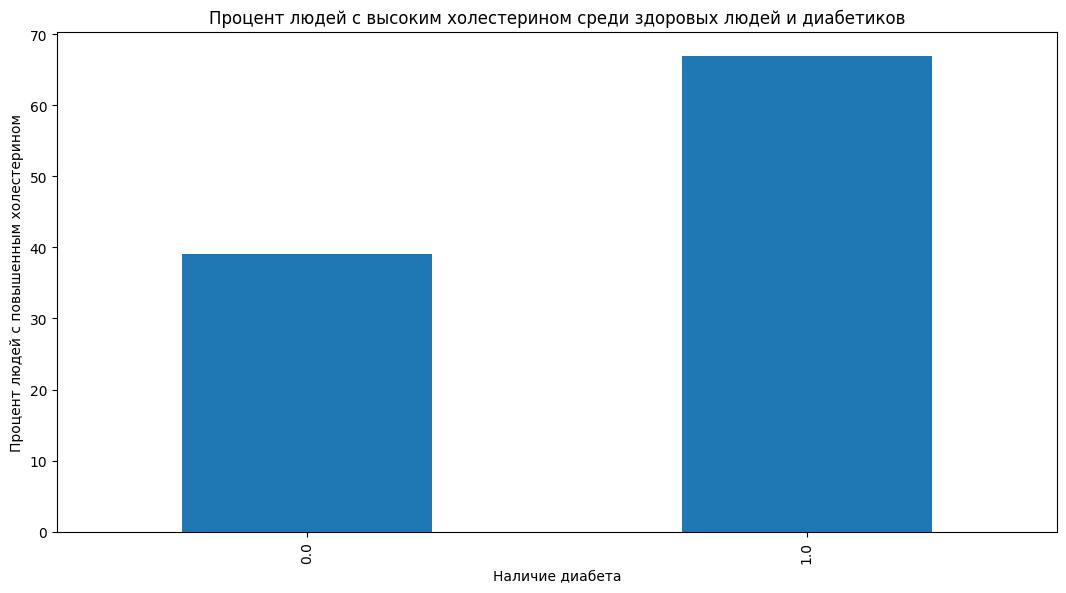

In [440]:
#Перероверим взаимосвязь между уровнем холестерина и наличием диабета
diabetes3['HighChol'] = diabetes3['HighChol'].apply(pd.to_numeric)
data = diabetes3.groupby('Outcome')['HighChol'].mean()*100
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0, 0, 1, 1])
data.plot(kind='bar')
axes.set_title("Процент людей с высоким холестерином среди здоровых людей и диабетиков")
axes.set_ylabel('Процент людей с повышенным холестерином')
axes.set_xlabel('Наличие диабета')

Появилась новая зависимость, в итоговом датасете уровень холестерина зависит от наличия диабета

Text(0.5, 0, 'Наличие диабета')

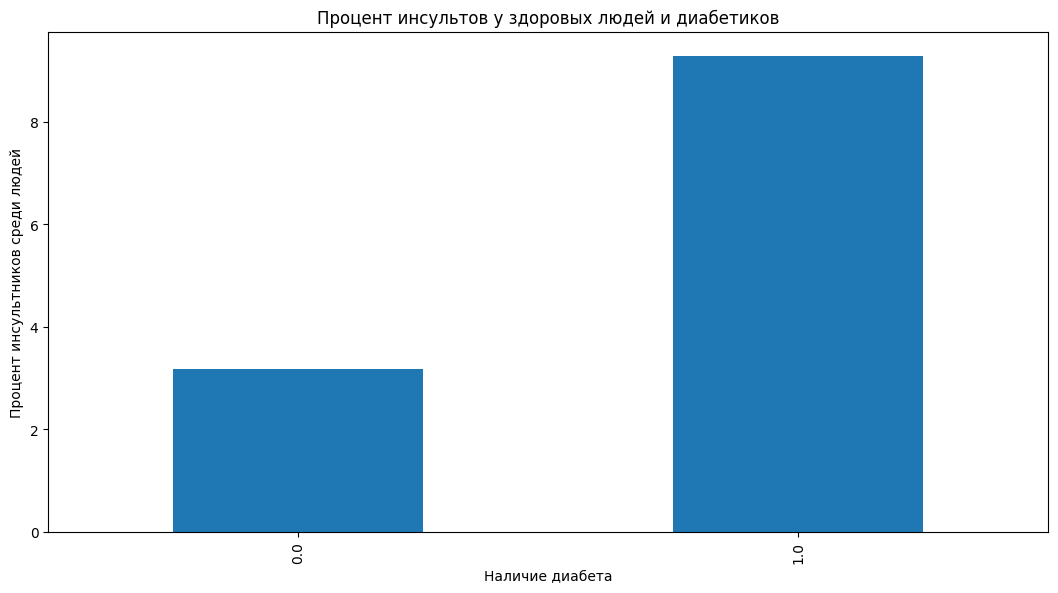

In [441]:
#Перепроверим есть ли взаимосвязь между количеством инсультов и наличием диабета
diabetes3['prevalentStroke'] = diabetes3['prevalentStroke'].apply(pd.to_numeric)
data = diabetes3.groupby('Outcome')['prevalentStroke'].mean()*100
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes([0, 0, 1, 1])
data.plot(kind='bar')
axes.set_title("Процент инсультов у здоровых людей и диабетиков")
axes.set_ylabel('Процент инсультников среди людей')
axes.set_xlabel('Наличие диабета')

В большей выборке тенденция сохранилась(у диабетиков инсульт случается чаще) но процент стал выше как среди диабетикав так и среди здоровых пациентов

Text(0.5, 1.0, 'соотношение пола среди диабетиков')

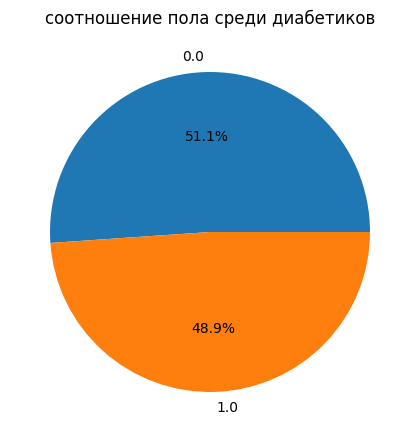

In [442]:
#Перепроверим влияние пола на наличие диабета
data = diabetes3[diabetes3['Outcome'] == 1]['Sex'].value_counts()
fig = plt.figure(figsize=(12,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(data, labels = data.index, autopct='%.1f%%')
axes.set_title('соотношение пола среди диабетиков')

В итоговой выборке соотношение немного изменилось, доля женщин стала больше мужской доли

Text(0.5, 1.0, 'Распредление возраста среди диабетиков')

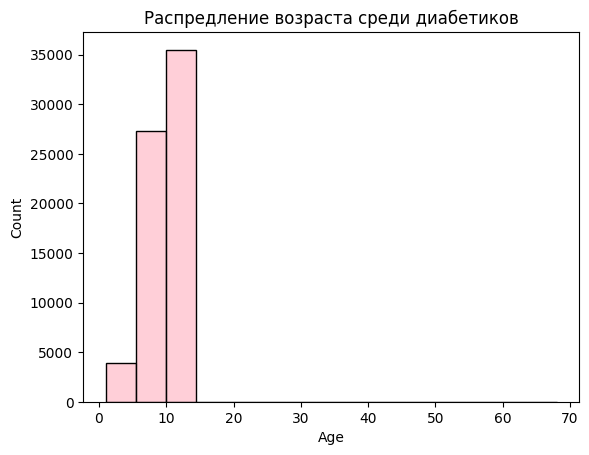

In [443]:
#Перепроверим распределение возраста среди диабетиков
data = diabetes3[diabetes3['Outcome'] == 1]['Age']
hist = sns.histplot(
    x=data,
    bins=15,
    color='pink'
)
hist.set_title('Распредление возраста среди диабетиков')

Распределение сильно изменилось, в итоговом датасете преобладают дети-диабетики до 15 лет

In [445]:
diabetes3.head()

,BMI,Age,Outcome,prevalentStroke,Sex,HighChol,HighBP,CholCheck,Smoker,HeartDiseaseorAttack,...,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Income
0,14.00,12.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
1,14.00,12.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0
2,16.48,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.61,48.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.92,63.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
